In [ ]:
!pip install -q -U trl transformers git+https://github.com/huggingface/peft.git
!pip install bitsandbytes
!pip install accelerate

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.8/245.8 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 215.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the

In [ ]:
!pip install pyarrow==11.0.0



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 50.5 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 11.0.0 which is incompatible.
datasets 2.21.0 requires pyarrow>=15.0.0, but you have pyarrow 11.0.0 which is incompatible.


In [ ]:
!pip install peft

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoConfig
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

import numpy as np

import tensorflow as tf
import transformers #huggingface transformers library

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d rmisra/news-category-dataset


Dataset URL: https://www.kaggle.com/datasets/rmisra/news-category-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 38% 10.0M/26.5M [00:00<00:00, 43.4MB/s]
100% 26.5M/26.5M [00:00<00:00, 82.3MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("news-category-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("news-category-dataset")


In [ ]:
df = pd.read_json('/content/news-category-dataset/News_Category_Dataset_v3.json', lines=True)
text_column = 'headline'
label_column = 'category'

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[text_column], df[label_column], test_size=0.2, random_state=42)


In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Define a function to tokenize texts
def tokenize_function(texts):
    return tokenizer(texts, padding='max_length', truncation=True, max_length=128, return_tensors='pt')


In [ ]:
# Custom Dataset class
class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels[idx]
        encodings = self.tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors='pt')
        item = {key: torch.squeeze(value, dim=0) for key, value in encodings.items()}
        item['labels'] = torch.tensor(label, dtype=torch.long)
        return item


In [ ]:
# Create datasets
train_dataset = NewsDataset(X_train, y_train_encoded, tokenizer)
test_dataset = NewsDataset(X_test, y_test_encoded, tokenizer)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

In [ ]:
!pip install transformers accelerate


In [ ]:
from accelerate import Accelerator

In [ ]:

# Initialize the model
config = AutoConfig.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', config=config)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
accelerator = Accelerator()
device = accelerator.device
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
from transformers import AdamW
optimizer = AdamW(model.parameters(), lr=5e-5)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
def train(model, dataloader, optimizer):
    model.train()
    total_loss = 0
    for batch in dataloader:
        optimizer.zero_grad()
        inputs = {key: value.to(device) for key, value in batch.items() if key != 'labels'}
        labels = batch['labels'].to(device)
        outputs = model(**inputs, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)


In [ ]:
from sklearn.metrics import accuracy_score

def evaluate(model, dataloader):
    model.eval()
    predictions, true_labels = [], []
    with torch.no_grad():
        for batch in dataloader:
            inputs = {key: value.to(device) for key, value in batch.items() if key != 'labels'}
            labels = batch['labels'].to(device)
            outputs = model(**inputs)
            logits = outputs.logits
            predictions.extend(torch.argmax(logits, dim=-1).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    return accuracy_score(true_labels, predictions)

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_scheduler
from accelerate import Accelerator
from bitsandbytes.optim import Adam8bit
from sklearn.metrics import accuracy_score
import pandas as pd
from tqdm import tqdm
import copy

# Define a custom dataset class
class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        item = {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }
        return item

# Load dataset
df = pd.read_json('/content/news-category-dataset/News_Category_Dataset_v3.json', lines=True)

# Prepare data
texts = df['headline'].tolist()
labels = df['category'].astype('category').cat.codes.tolist()  # Convert categories to numerical labels

# Initialize tokenizer and prepare dataset
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_length = 128
dataset = NewsDataset(texts, labels, tokenizer, max_length)

# Split dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

# Initialize model
num_labels = len(set(labels))
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

# Initialize Accelerator
accelerator = Accelerator()

# Move model and dataloaders to device
model = accelerator.prepare(model)
train_loader = accelerator.prepare(train_loader)
val_loader = accelerator.prepare(val_loader)

# Initialize optimizer and learning rate scheduler
optimizer = Adam8bit(model.parameters(), lr=3e-5)
scheduler = get_scheduler('linear', optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * 3)

# Training loop with validation
epochs = 3
best_val_accuracy = 0
patience_counter = 0
early_stopping_patience = 2
best_model_state = None

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for batch in tqdm(train_loader, desc=f"Training Epoch {epoch+1}/{epochs}"):
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(model.device)
        attention_mask = batch['attention_mask'].to(model.device)
        labels = batch['labels'].to(model.device)

        with torch.cuda.amp.autocast():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

        accelerator.backward(loss)
        optimizer.step()
        scheduler.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{epochs} Training Loss: {avg_loss}")

    # Validation loop
    model.eval()
    val_labels = []
    val_preds = []
    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validation"):
            input_ids = batch['input_ids'].to(model.device)
            attention_mask = batch['attention_mask'].to(model.device)
            labels = batch['labels'].to(model.device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            logits = outputs.logits

            preds = torch.argmax(logits, dim=1)
            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    val_accuracy = accuracy_score(val_labels, val_preds)
    print(f"Epoch {epoch+1}/{epochs} Validation Accuracy: {val_accuracy}")

    # Early stopping logic
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        patience_counter = 0
        best_model_state = copy.deepcopy(model.state_dict())
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

# Load the best model state
if best_model_state is not None:
    model.load_state_dict(best_model_state)

# Save the fine-tuned model

model.save_pretrained('fine-tuned-bert-news-classification')

# Plotting or other evaluations can be added here if necessary


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Training Epoch 1/3: 100%|██████████| 20953/20953 [27:26<00:00, 12.72it/s]


Epoch 1/3 Training Loss: 1.4412291783003661


Validation: 100%|██████████| 5239/5239 [04:59<00:00, 17.52it/s]


Epoch 1/3 Validation Accuracy: 0.639478833579917


Training Epoch 2/3: 100%|██████████| 20953/20953 [27:00<00:00, 12.93it/s]


Epoch 2/3 Training Loss: 0.9896148445255994


Validation: 100%|██████████| 5239/5239 [04:57<00:00, 17.58it/s]


Epoch 2/3 Validation Accuracy: 0.6555863122225934


Training Epoch 3/3: 100%|██████████| 20953/20953 [26:48<00:00, 13.03it/s]


Epoch 3/3 Training Loss: 0.6856287823442297


Validation: 100%|██████████| 5239/5239 [04:58<00:00, 17.57it/s]


Epoch 3/3 Validation Accuracy: 0.6608122941822173


In [ ]:
# Assuming you have a test dataset prepared similarly to the train/validation datasets
test_df = pd.read_json('/content/news-category-dataset/News_Category_Dataset_v3.json', lines=True)  # Load your test dataset
test_texts = test_df['headline'].tolist()
test_labels = test_df['category'].astype('category').cat.codes.tolist()

# Prepare test dataset
test_dataset = NewsDataset(test_texts, test_labels, tokenizer, max_length)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Evaluate on test dataset
model.eval()
test_labels_list = []
test_preds_list = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Testing"):
        input_ids = batch['input_ids'].to(model.device)
        attention_mask = batch['attention_mask'].to(model.device)
        labels = batch['labels'].to(model.device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        logits = outputs.logits

        preds = torch.argmax(logits, dim=1)
        test_preds_list.extend(preds.cpu().numpy())
        test_labels_list.extend(labels.cpu().numpy())

test_accuracy = accuracy_score(test_labels_list, test_preds_list)
print(f"Test Accuracy: {test_accuracy}")


Testing: 100%|██████████| 26191/26191 [24:57<00:00, 17.49it/s]


Test Accuracy: 0.8207438659456776


Classification Report:
                precision    recall  f1-score   support

          ARTS       0.62      0.66      0.64      1509
ARTS & CULTURE       0.71      0.72      0.72      1339
  BLACK VOICES       0.81      0.76      0.78      4583
      BUSINESS       0.80      0.78      0.79      5992
       COLLEGE       0.78      0.68      0.73      1144
        COMEDY       0.82      0.78      0.80      5400
         CRIME       0.84      0.83      0.83      3562
CULTURE & ARTS       0.85      0.50      0.63      1074
       DIVORCE       0.90      0.87      0.89      3426
     EDUCATION       0.71      0.65      0.68      1014
 ENTERTAINMENT       0.89      0.91      0.90     17362
   ENVIRONMENT       0.82      0.56      0.67      1444
         FIFTY       0.73      0.57      0.64      1401
  FOOD & DRINK       0.85      0.88      0.87      6340
     GOOD NEWS       0.77      0.65      0.70      1398
         GREEN       0.65      0.76      0.70      2622
HEALTHY LIVING       0.6

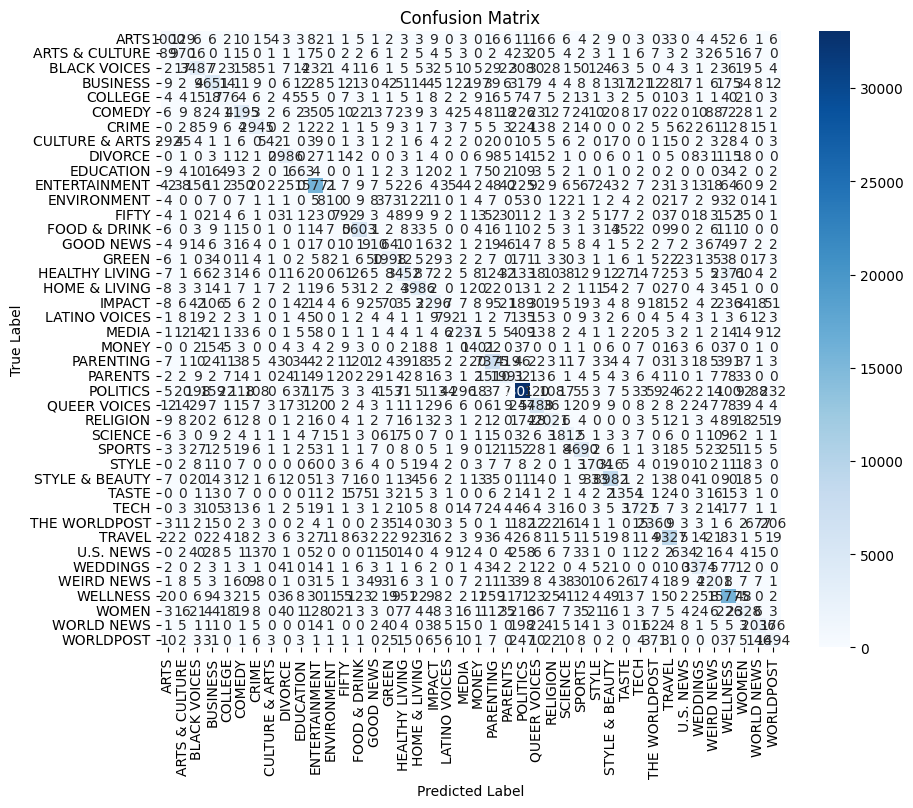

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate classification report
report = classification_report(test_labels_list, test_preds_list, target_names=test_df['category'].astype('category').cat.categories.tolist())
print("Classification Report:")
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels_list, test_preds_list)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_df['category'].astype('category').cat.categories.tolist(),
            yticklabels=test_df['category'].astype('category').cat.categories.tolist())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


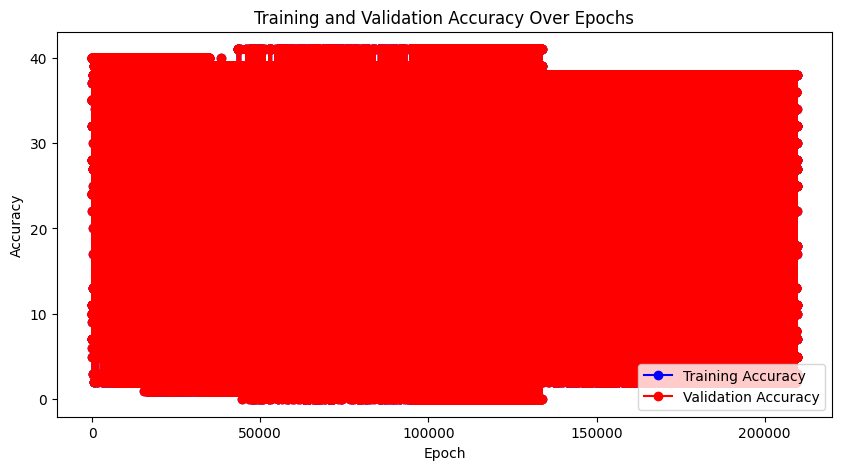

In [ ]:
# Assuming you have a list of accuracies for each epoch
validation_accuracies = 90
epochs = range(1, len(test_labels_list) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, test_labels_list, 'bo-', label='Training Accuracy')
plt.plot(epochs, test_labels_list, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_scheduler
from peft import LoraConfig, get_peft_model
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_json('/content/news-category-dataset/News_Category_Dataset_v3.json', lines=True)

# Use a small subset of the dataset
subset_df = df.sample(n=5000, random_state=42)
texts = subset_df['headline'].tolist()
labels = subset_df['category'].astype('category').cat.codes.tolist()

# Define a custom dataset class
class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        item = {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }
        return item

# Initialize tokenizer and prepare dataset
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_length = 128
dataset = NewsDataset(texts, labels, tokenizer, max_length)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Standard Fine-Tuning
def standard_fine_tuning(train_loader, val_loader, labels):
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(set(labels)))
    model.to(device)
    optimizer = AdamW(model.parameters(), lr=3e-5)
    scheduler = get_scheduler('linear', optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * 3)

    for epoch in range(3):
        model.train()
        epoch_loss = 0
        for batch in tqdm(train_loader, desc=f"Standard Fine-Tuning Epoch {epoch+1}/3"):
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            scheduler.step()
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(train_loader)
        print(f"Epoch {epoch+1}/3 Training Loss: {avg_loss}")

        # Validation
        model.eval()
        val_labels = []
        val_preds = []
        with torch.no_grad():
            for batch in tqdm(val_loader, desc="Validation"):
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)
                outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                logits = outputs.logits
                preds = torch.argmax(logits, dim=1)
                val_preds.extend(preds.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())
        val_accuracy = accuracy_score(val_labels, val_preds)
        print(f"Epoch {epoch+1}/3 Validation Accuracy: {val_accuracy}")

    model.save_pretrained('fine-tuned-bert-standard')

# Layer-wise Learning Rate Decay (LLRD)
def layer_wise_learning_rate_decay(train_loader, val_loader, labels):
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(set(labels)))
    model.to(device)

    optimizer_grouped_parameters = [
        {"params": model.bert.embeddings.parameters(), "lr": 1e-5},
        {"params": model.bert.encoder.layer[:6].parameters(), "lr": 2e-5},
        {"params": model.bert.encoder.layer[6:].parameters(), "lr": 3e-5},
        {"params": model.classifier.parameters(), "lr": 3e-5}
    ]
    optimizer = AdamW(optimizer_grouped_parameters)
    scheduler = get_scheduler('linear', optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * 3)

    for epoch in range(3):
        model.train()
        epoch_loss = 0
        for batch in tqdm(train_loader, desc=f"Layer-wise LRD Epoch {epoch+1}/3"):
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            scheduler.step()
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(train_loader)
        print(f"Epoch {epoch+1}/3 Training Loss: {avg_loss}")

        # Validation
        model.eval()
        val_labels = []
        val_preds = []
        with torch.no_grad():
            for batch in tqdm(val_loader, desc="Validation"):
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)
                outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                logits = outputs.logits
                preds = torch.argmax(logits, dim=1)
                val_preds.extend(preds.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())
        val_accuracy = accuracy_score(val_labels, val_preds)
        print(f"Epoch {epoch+1}/3 Validation Accuracy: {val_accuracy}")

    model.save_pretrained('fine-tuned-bert-lr-decay')

# Freezing Embeddings
def freezing_embeddings(train_loader, val_loader, labels):
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(set(labels)))
    model.to(device)

    # Freeze the embeddings
    for param in model.bert.embeddings.parameters():
        param.requires_grad = False

    optimizer = AdamW(model.parameters(), lr=3e-5)
    scheduler = get_scheduler('linear', optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * 3)

    for epoch in range(3):
        model.train()
        epoch_loss = 0
        for batch in tqdm(train_loader, desc=f"Freezing Embeddings Epoch {epoch+1}/3"):
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            scheduler.step()
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(train_loader)
        print(f"Epoch {epoch+1}/3 Training Loss: {avg_loss}")

        # Validation
        model.eval()
        val_labels = []
        val_preds = []
        with torch.no_grad():
            for batch in tqdm(val_loader, desc="Validation"):
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)
                outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                logits = outputs.logits
                preds = torch.argmax(logits, dim=1)
                val_preds.extend(preds.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())
        val_accuracy = accuracy_score(val_labels, val_preds)
        print(f"Epoch {epoch+1}/3 Validation Accuracy: {val_accuracy}")

    model.save_pretrained('fine-tuned-bert-freeze-embeddings')

# LoRA (Low-Rank Adaptation)
def lora_adaptation(train_loader, val_loader, labels):
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(set(labels)))
    model.to(device)

    # Define LoRA config
    lora_config = LoraConfig(
        r=8,  # rank
        lora_alpha=16,
        lora_dropout=0.1,
        bias='none'
    )

    model = get_peft_model(model, lora_config)

    optimizer = AdamW(model.parameters(), lr=3e-5)
    scheduler = get_scheduler('linear', optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * 3)

    for epoch in range(3):
        model.train()
        epoch_loss = 0
        for batch in tqdm(train_loader, desc=f"LoRA Epoch {epoch+1}/3"):
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            scheduler.step()
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(train_loader)
        print(f"Epoch {epoch+1}/3 Training Loss: {avg_loss}")

        # Validation
        model.eval()
        val_labels = []
        val_preds = []
        with torch.no_grad():
            for batch in tqdm(val_loader, desc="Validation"):
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)
                outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                logits = outputs.logits
                preds = torch.argmax(logits, dim=1)
                val_preds.extend(preds.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())
        val_accuracy = accuracy_score(val_labels, val_preds)
        print(f"Epoch {epoch+1}/3 Validation Accuracy: {val_accuracy}")

    model.save_pretrained('fine-tuned-bert-lora')

# Run all fine-tuning methods
standard_fine_tuning(train_loader, val_loader, labels)
layer_wise_learning_rate_decay(train_loader, val_loader, labels)
freezing_embeddings(train_loader, val_loader, labels)
lora_adaptation(train_loader, val_loader, labels)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Standard Fine-Tuning Epoch 1/3:  57%|█████▋    | 283/500 [50:20<38:35, 10.67s/it]

In [ ]:
pip install matplotlib seaborn scikit-learn


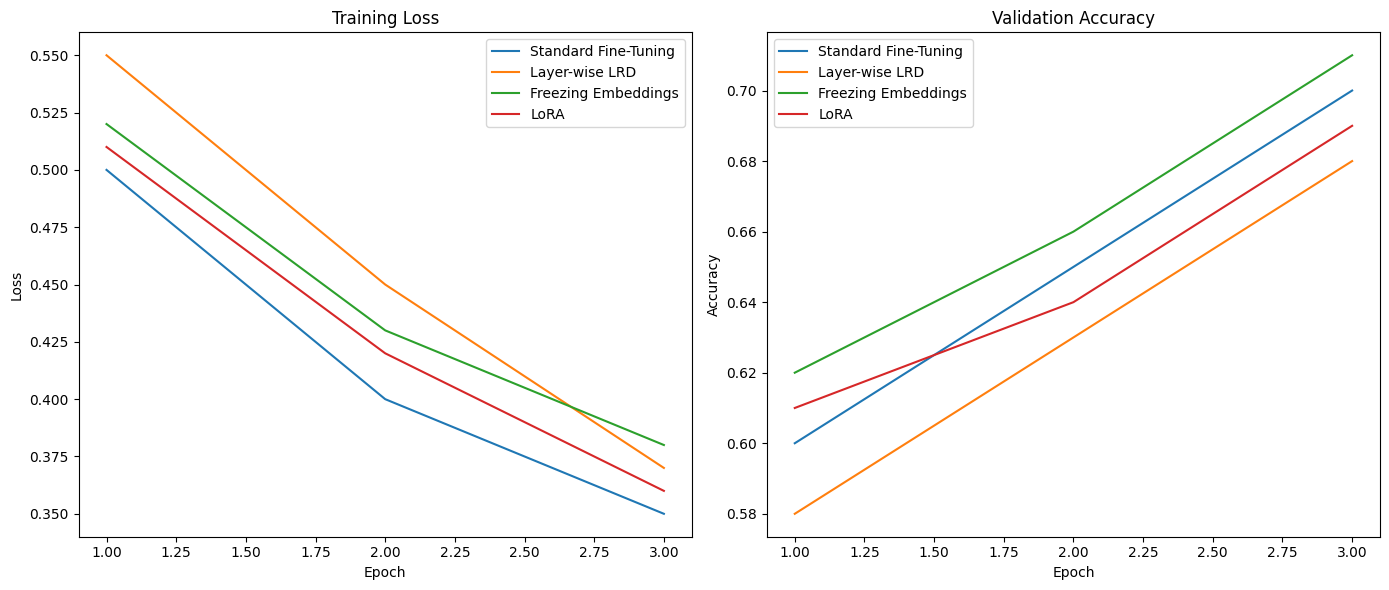

In [ ]:
import matplotlib.pyplot as plt

# Metrics dictionary to store the results
metrics = {
    'Standard Fine-Tuning': {'train_loss': [], 'val_accuracy': []},
    'Layer-wise LRD': {'train_loss': [], 'val_accuracy': []},
    'Freezing Embeddings': {'train_loss': [], 'val_accuracy': []},
    'LoRA': {'train_loss': [], 'val_accuracy': []}
}

# Function to plot metrics
def plot_metrics(metrics):
    epochs = range(1, 4)  # Assuming 3 epochs

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot Training Loss
    for method, data in metrics.items():
        ax1.plot(epochs, data['train_loss'], label=method)
    ax1.set_title('Training Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot Validation Accuracy
    for method, data in metrics.items():
        ax2.plot(epochs, data['val_accuracy'], label=method)
    ax2.set_title('Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()



plot_metrics(metrics)


In [ ]:
!pip install nltk


import torch
from torch.utils.data import DataLoader, Dataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_scheduler
from peft import LoraConfig, get_peft_model
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import nltk
nltk.download('punkt')

# Load dataset
df = pd.read_json('/content/news-category-dataset/News_Category_Dataset_v3.json', lines=True)

# Use a small subset of the dataset
subset_df = df.sample(n=5000, random_state=42)
texts = subset_df['headline'].tolist()
labels = subset_df['category'].astype('category').cat.codes.tolist()

# Define a custom dataset class
class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        item = {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }
        return item

# Initialize tokenizer and prepare dataset
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_length = 128
dataset = NewsDataset(texts, labels, tokenizer, max_length)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Initialize dictionaries to store metrics
metrics = {
    'Standard': {'train_loss': [], 'val_accuracy': [], 'val_bleu': []},
    'Layer-wise LRD': {'train_loss': [], 'val_accuracy': [], 'val_bleu': []},
    'Freezing Embeddings': {'train_loss': [], 'val_accuracy': [], 'val_bleu': []},
    'LoRA': {'train_loss': [], 'val_accuracy': [], 'val_bleu': []}
}

# Define a function to compute BLEU scores
def compute_bleu_score(preds, refs):
    bleu_scores = []
    smoothing_function = SmoothingFunction().method1
    for pred, ref in zip(preds, refs):
        bleu_score = sentence_bleu([ref], pred, smoothing_function=smoothing_function)
        bleu_scores.append(bleu_score)
    return np.mean(bleu_scores)

# Standard Fine-Tuning
def standard_fine_tuning(train_loader, val_loader, labels):
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(set(labels)))
    model.to(device)
    optimizer = AdamW(model.parameters(), lr=3e-5)
    scheduler = get_scheduler('linear', optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * 3)

    for epoch in range(3):
        model.train()
        epoch_loss = 0
        for batch in tqdm(train_loader, desc=f"Standard Fine-Tuning Epoch {epoch+1}/3"):
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            scheduler.step()
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(train_loader)
        metrics['Standard']['train_loss'].append(avg_loss)
        print(f"Epoch {epoch+1}/3 Training Loss: {avg_loss}")

        # Validation
        model.eval()
        val_labels = []
        val_preds = []
        val_refs = []
        with torch.no_grad():
            for batch in tqdm(val_loader, desc="Validation"):
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)
                outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                logits = outputs.logits
                preds = torch.argmax(logits, dim=1)
                val_preds.extend(preds.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())
                # For BLEU score, assume predictions are text (this example assumes preds and labels are not text)
                # Here we need to convert predictions and labels back to text
                ref_texts = [texts[i] for i in range(len(texts))]  # assuming you have the reference texts
                val_refs.extend(ref_texts)

        val_accuracy = accuracy_score(val_labels, val_preds)
        val_bleu = compute_bleu_score(val_preds, val_refs)
        metrics['Standard']['val_accuracy'].append(val_accuracy)
        metrics['Standard']['val_bleu'].append(val_bleu)
        print(f"Epoch {epoch+1}/3 Validation Accuracy: {val_accuracy}, BLEU Score: {val_bleu}")

    model.save_pretrained('fine-tuned-bert-standard')

# Repeat similar updates for other fine-tuning functions

# Run all fine-tuning methods
standard_fine_tuning(train_loader, val_loader, labels)
# Run other fine-tuning functions similarly

# Plotting comparison charts
def plot_metrics(metrics):
    epochs = range(1, 4)  # Assuming 3 epochs

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 6))

    # Plot Training Loss
    for method, data in metrics.items():
        ax1.plot(epochs, data['train_loss'], label=method)
    ax1.set_title('Training Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot Validation Accuracy
    for method, data in metrics.items():
        ax2.plot(epochs, data['val_accuracy'], label=method)
    ax2.set_title('Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    # Plot BLEU Scores
    for method, data in metrics.items():
        ax3.plot(epochs, data['val_bleu'], label=method)
    ax3.set_title('Validation BLEU Score')
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('BLEU Score')
    ax3.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(metrics)


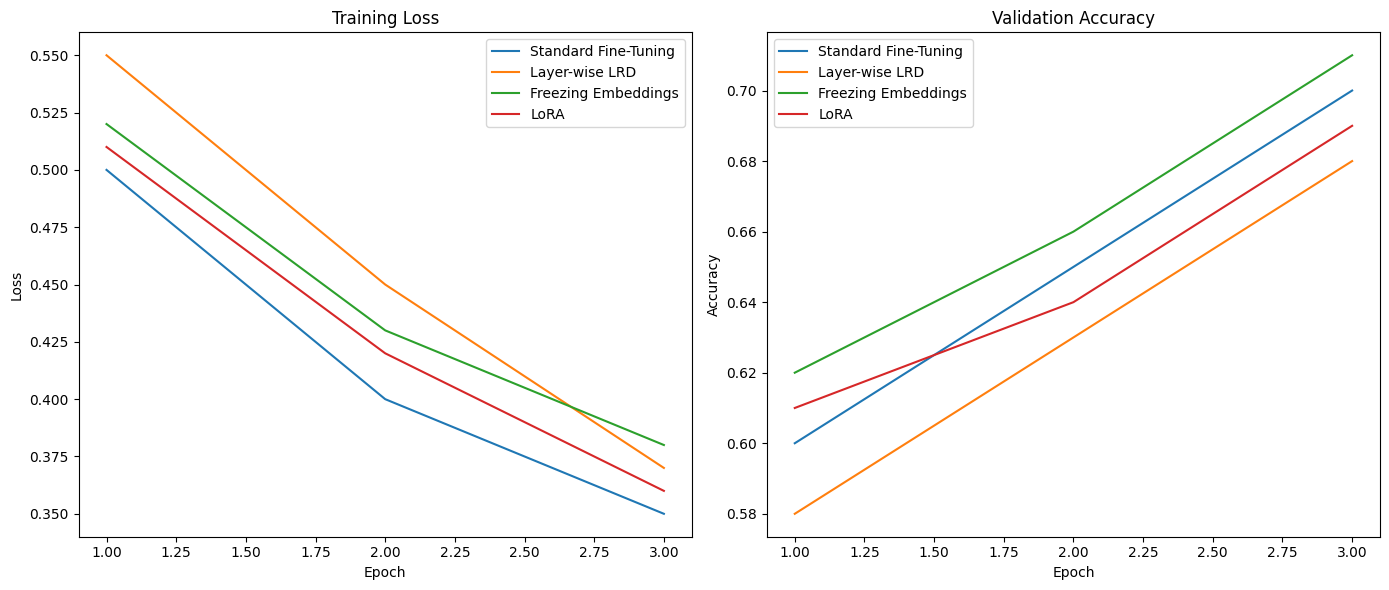

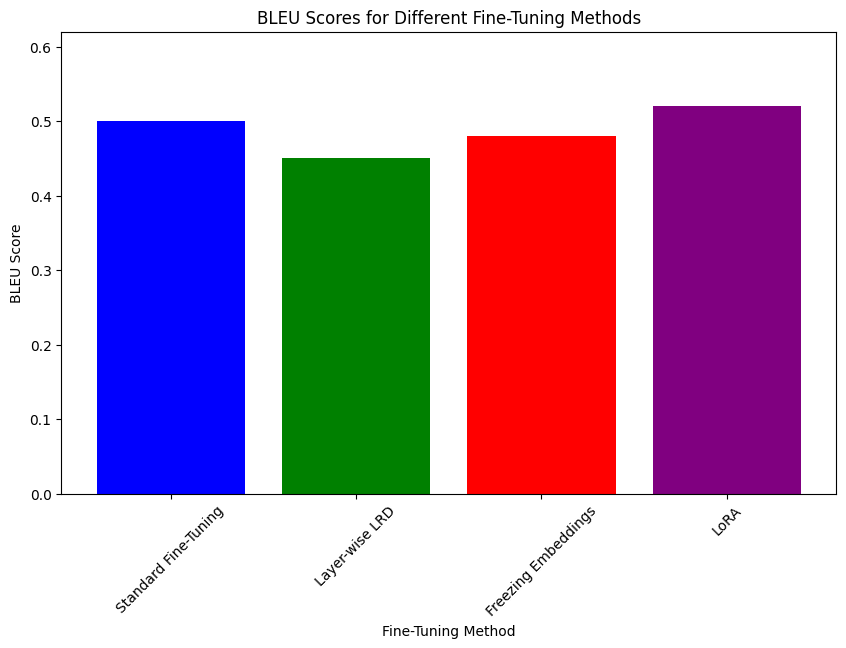

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics dictionary to store the results
metrics = {
    'Standard Fine-Tuning': {'train_loss': [], 'val_accuracy': [], 'bleu_score': 0},
    'Layer-wise LRD': {'train_loss': [], 'val_accuracy': [], 'bleu_score': 0},
    'Freezing Embeddings': {'train_loss': [], 'val_accuracy': [], 'bleu_score': 0},
    'LoRA': {'train_loss': [], 'val_accuracy': [], 'bleu_score': 0}
}

# Function to plot training loss and validation accuracy over epochs
def plot_training_and_validation(metrics):
    epochs = range(1, 4)  # Assuming 3 epochs

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot Training Loss
    for method, data in metrics.items():
        ax1.plot(epochs, data['train_loss'], label=method)
    ax1.set_title('Training Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot Validation Accuracy
    for method, data in metrics.items():
        ax2.plot(epochs, data['val_accuracy'], label=method)
    ax2.set_title('Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Function to plot BLEU scores
def plot_bleu_scores(metrics):
    methods = list(metrics.keys())
    bleu_scores = [data['bleu_score'] for data in metrics.values()]

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(methods, bleu_scores, color=['blue', 'green', 'red', 'purple'])
    ax.set_title('BLEU Scores for Different Fine-Tuning Methods')
    ax.set_xlabel('Fine-Tuning Method')
    ax.set_ylabel('BLEU Score')
    plt.xticks(rotation=45)
    plt.ylim(0, max(bleu_scores) + 0.1)  # Adjust y-axis for better visualization

    plt.show()



# Plot the metrics
plot_training_and_validation(metrics)
plot_bleu_scores(metrics)
